In [1]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as st

%matplotlib inline

In D:\Applications\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Applications\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Applications\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Applications\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Applications\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

# 1. Understanding The Data

In [2]:
train = pd.read_csv('train.csv', parse_dates = ['date']) #Loading train data and making sure the date column is in the date datatype

In [3]:
train.head() #Showing the first 5 rows

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation
0,0_2000-04-01,0,2000-04-01,25.447,5.296,0.003688,1250.622712,0.0,-178.916305,1250.622712,...,0.0,0.350169,0.0,0.649524,0.0,0.000307,0.0,0.0,2.214262,0.198996
1,1_2000-04-01,1,2000-04-01,25.669,5.293,0.000000,1238.019166,0.0,-150.779947,1238.019166,...,0.0,0.429049,0.0,0.570644,0.0,0.000307,0.0,0.0,3.833042,0.188071
2,2_2000-04-01,2,2000-04-01,25.443,5.074,0.000000,1240.449964,0.0,-200.503858,1240.449964,...,0.0,0.238300,0.0,0.761700,0.0,0.000000,0.0,0.0,1.927303,0.211730
3,3_2000-04-01,3,2000-04-01,25.665,5.070,0.000000,1229.240077,0.0,-177.011032,1229.240077,...,0.0,0.488146,0.0,0.511854,0.0,0.000000,0.0,0.0,1.878281,0.215403
4,4_2000-04-01,4,2000-04-01,25.886,5.067,0.000307,1224.093679,0.0,-153.256111,1224.093679,...,0.0,0.322243,0.0,0.677757,0.0,0.000000,0.0,0.0,1.968818,0.199975


In [4]:
train.tail() #Showing the last 5 rows

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation
626639,3816_2013-12-01,3816,2013-12-01,29.075,-13.214,0.0,1135.610247,0.0,147.779270,1135.610247,...,0.0,0.008885,0.0,0.988557,0.0,0.002558,0.0,0.0,14.813819,0.313800
626640,3817_2013-12-01,3817,2013-12-01,29.298,-13.202,0.0,1143.499063,0.0,130.235363,1143.499063,...,0.0,0.006661,0.0,0.993339,0.0,0.000000,0.0,0.0,14.815366,0.320290
626641,3818_2013-12-01,3818,2013-12-01,29.522,-13.189,0.0,1139.045620,0.0,115.538994,1139.045620,...,0.0,0.019980,0.0,0.980020,0.0,0.000000,0.0,0.0,15.981201,0.317855
626642,3819_2013-12-01,3819,2013-12-01,29.745,-13.176,0.0,1141.168210,0.0,-7.484351,1141.168210,...,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,15.206220,0.282233
626643,3820_2013-12-01,3820,2013-12-01,29.758,-13.394,0.0,1160.088274,0.0,-66.498403,1160.088274,...,0.0,0.000000,0.0,0.999986,0.0,0.000014,0.0,0.0,15.574830,0.264007


In [5]:
train.describe() #description of all columns of the train data

,area,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,...,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation
count,626644.000000,626644.000000,626644.000000,626644.000000,626644.000000,626644.000000,626644.000000,626644.000000,626644.000000,626644.000000,...,626644.000000,626644.000000,6.266440e+05,626644.000000,626644.000000,626644.000000,626644.000000,626644.000000,607128.000000,626644.000000
mean,1910.000000,23.743978,-2.859994,0.014904,868.907429,223.509282,-258.714705,1092.416972,125.868639,38.823932,...,0.000036,0.771477,1.397882e-07,0.188189,0.000266,0.026382,0.000040,0.001157,30.022468,0.181763
std,1103.028532,3.892348,4.397921,0.061526,287.975104,372.066304,331.469776,170.072823,86.558539,55.748898,...,0.000709,0.327120,7.314258e-06,0.314002,0.004851,0.086140,0.000533,0.009156,175.864136,0.130271
min,0.000000,12.416000,-13.394000,0.000000,7.438208,0.000000,-1387.832916,510.639390,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,955.000000,20.741000,-6.146000,0.000000,781.852462,0.000000,-467.326288,973.879811,54.756412,2.998071,...,0.000000,0.590311,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.140170,0.078666
50%,1910.000000,24.107000,-2.945000,0.000000,954.076835,0.000000,-293.756227,1068.663459,128.187523,8.000000,...,0.000000,0.975270,0.000000e+00,0.000000,0.000000,0.000307,0.000000,0.000000,14.146377,0.171292
75%,2865.000000,26.956000,0.857000,0.000000,1056.306879,333.155481,-110.273937,1184.196489,184.165079,63.968079,...,0.000000,1.000000,0.000000e+00,0.298845,0.000000,0.010451,0.000000,0.000000,26.957529,0.261780
max,3820.000000,31.096000,5.296000,0.952641,1666.262670,2048.897442,1131.222423,2125.220848,1111.881507,1028.775818,...,0.044034,1.000000,6.147222e-04,1.000000,0.197675,0.991276,0.023099,0.478727,9514.004270,1.187434


In [6]:
train.info() #information about the columns of the train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626644 entries, 0 to 626643
Data columns (total 32 columns):
ID                    626644 non-null object
area                  626644 non-null int64
date                  626644 non-null datetime64[ns]
lat                   626644 non-null float64
lon                   626644 non-null float64
burn_area             626644 non-null float64
climate_aet           626644 non-null float64
climate_def           626644 non-null float64
climate_pdsi          626644 non-null float64
climate_pet           626644 non-null float64
climate_pr            626644 non-null float64
climate_ro            626644 non-null float64
climate_soil          626644 non-null float64
climate_srad          626644 non-null float64
climate_swe           626644 non-null float64
climate_tmmn          626644 non-null float64
climate_tmmx          626644 non-null float64
climate_vap           626644 non-null float64
climate_vpd           626644 non-null float64
climate_vs 

In [7]:
train.isnull().sum() #Columns having null values

ID                        0
area                      0
date                      0
lat                       0
lon                       0
burn_area                 0
climate_aet               0
climate_def               0
climate_pdsi              0
climate_pet               0
climate_pr                0
climate_ro                0
climate_soil              0
climate_srad              0
climate_swe               0
climate_tmmn              0
climate_tmmx              0
climate_vap               0
climate_vpd               0
climate_vs                0
elevation                 0
landcover_0               0
landcover_1               0
landcover_2               0
landcover_3               0
landcover_4               0
landcover_5               0
landcover_6               0
landcover_7               0
landcover_8               0
population_density    19516
precipitation             0
dtype: int64

In [8]:
train #Showing the head and tail of the train data


,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation
0,0_2000-04-01,0,2000-04-01,25.447,5.296,0.003688,1250.622712,0.0,-178.916305,1250.622712,...,0.0,0.350169,0.0,0.649524,0.0,0.000307,0.0,0.0,2.214262,0.198996
1,1_2000-04-01,1,2000-04-01,25.669,5.293,0.000000,1238.019166,0.0,-150.779947,1238.019166,...,0.0,0.429049,0.0,0.570644,0.0,0.000307,0.0,0.0,3.833042,0.188071
2,2_2000-04-01,2,2000-04-01,25.443,5.074,0.000000,1240.449964,0.0,-200.503858,1240.449964,...,0.0,0.238300,0.0,0.761700,0.0,0.000000,0.0,0.0,1.927303,0.211730
3,3_2000-04-01,3,2000-04-01,25.665,5.070,0.000000,1229.240077,0.0,-177.011032,1229.240077,...,0.0,0.488146,0.0,0.511854,0.0,0.000000,0.0,0.0,1.878281,0.215403
4,4_2000-04-01,4,2000-04-01,25.886,5.067,0.000307,1224.093679,0.0,-153.256111,1224.093679,...,0.0,0.322243,0.0,0.677757,0.0,0.000000,0.0,0.0,1.968818,0.199975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626639,3816_2013-12-01,3816,2013-12-01,29.075,-13.214,0.000000,1135.610247,0.0,147.779270,1135.610247,...,0.0,0.008885,0.0,0.988557,0.0,0.002558,0.0,0.0,14.813819,0.313800
626640,3817_2013-12-01,3817,2013-12-01,29.298,-13.202,0.000000,1143.499063,0.0,130.235363,1143.499063,...,0.0,0.006661,0.0,0.993339,0.0,0.000000,0.0,0.0,14.815366,0.320290
626641,3818_2013-12-01,3818,2013-12-01,29.522,-13.189,0.000000,1139.045620,0.0,115.538994,1139.045620,...,0.0,0.019980,0.0,0.980020,0.0,0.000000,0.0,0.0,15.981201,0.317855
626642,3819_2013-12-01,3819,2013-12-01,29.745,-13.176,0.000000,1141.168210,0.0,-7.484351,1141.168210,...,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,15.206220,0.282233


In [9]:
train.shape #Showing the number of rows and columns of the data

(626644, 32)

In [10]:
train.index

RangeIndex(start=0, stop=626644, step=1)

In [11]:
train.columns #Name of the various columns of the data

Index(['ID', 'area', 'date', 'lat', 'lon', 'burn_area', 'climate_aet',
       'climate_def', 'climate_pdsi', 'climate_pet', 'climate_pr',
       'climate_ro', 'climate_soil', 'climate_srad', 'climate_swe',
       'climate_tmmn', 'climate_tmmx', 'climate_vap', 'climate_vpd',
       'climate_vs', 'elevation', 'landcover_0', 'landcover_1', 'landcover_2',
       'landcover_3', 'landcover_4', 'landcover_5', 'landcover_6',
       'landcover_7', 'landcover_8', 'population_density', 'precipitation'],
      dtype='object')

In [12]:
train.skew() #Showing the skewness of each column

area                    0.000000
lat                    -0.364325
lon                    -0.106590
burn_area               6.185755
climate_aet            -1.190739
climate_def             1.796624
climate_pdsi            0.430351
climate_pet             0.930980
climate_pr              0.605584
climate_ro              2.582094
climate_soil            0.927709
climate_srad           -0.026228
climate_swe           712.577947
climate_tmmn           -1.602733
climate_tmmx           -0.916025
climate_vap            -1.194977
climate_vpd             1.281093
climate_vs              1.204027
elevation               1.454046
landcover_0             8.808191
landcover_1            35.946781
landcover_2            -1.223483
landcover_3            58.557588
landcover_4             1.447193
landcover_5            29.572555
landcover_6             6.161935
landcover_7            22.733085
landcover_8            38.415482
population_density     41.207470
precipitation           0.719340
dtype: flo

In [13]:
train.kurt() #Showing the kurtosis analysis of each column

area                      -1.200000
lat                       -0.664348
lon                       -0.941587
burn_area                 46.262951
climate_aet                0.746458
climate_def                2.409611
climate_pdsi               0.346805
climate_pet                1.701290
climate_pr                 2.087934
climate_ro                15.225586
climate_soil               0.311625
climate_srad               0.037894
climate_swe           534072.899394
climate_tmmn               3.514600
climate_tmmx               3.413227
climate_vap                1.144096
climate_vpd                2.005541
climate_vs                 2.345136
elevation                  2.778068
landcover_0               81.883663
landcover_1             1563.574266
landcover_2               -0.015616
landcover_3             3848.874826
landcover_4                0.569839
landcover_5              987.604335
landcover_6               47.349268
landcover_7              661.527521
landcover_8             1878

In [14]:
# Percentage of null values present in each column
for col in train.columns:
    pct_missing = np.mean(train[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ID - 0.0%
area - 0.0%
date - 0.0%
lat - 0.0%
lon - 0.0%
burn_area - 0.0%
climate_aet - 0.0%
climate_def - 0.0%
climate_pdsi - 0.0%
climate_pet - 0.0%
climate_pr - 0.0%
climate_ro - 0.0%
climate_soil - 0.0%
climate_srad - 0.0%
climate_swe - 0.0%
climate_tmmn - 0.0%
climate_tmmx - 0.0%
climate_vap - 0.0%
climate_vpd - 0.0%
climate_vs - 0.0%
elevation - 0.0%
landcover_0 - 0.0%
landcover_1 - 0.0%
landcover_2 - 0.0%
landcover_3 - 0.0%
landcover_4 - 0.0%
landcover_5 - 0.0%
landcover_6 - 0.0%
landcover_7 - 0.0%
landcover_8 - 0.0%
population_density - 3.0%
precipitation - 0.0%


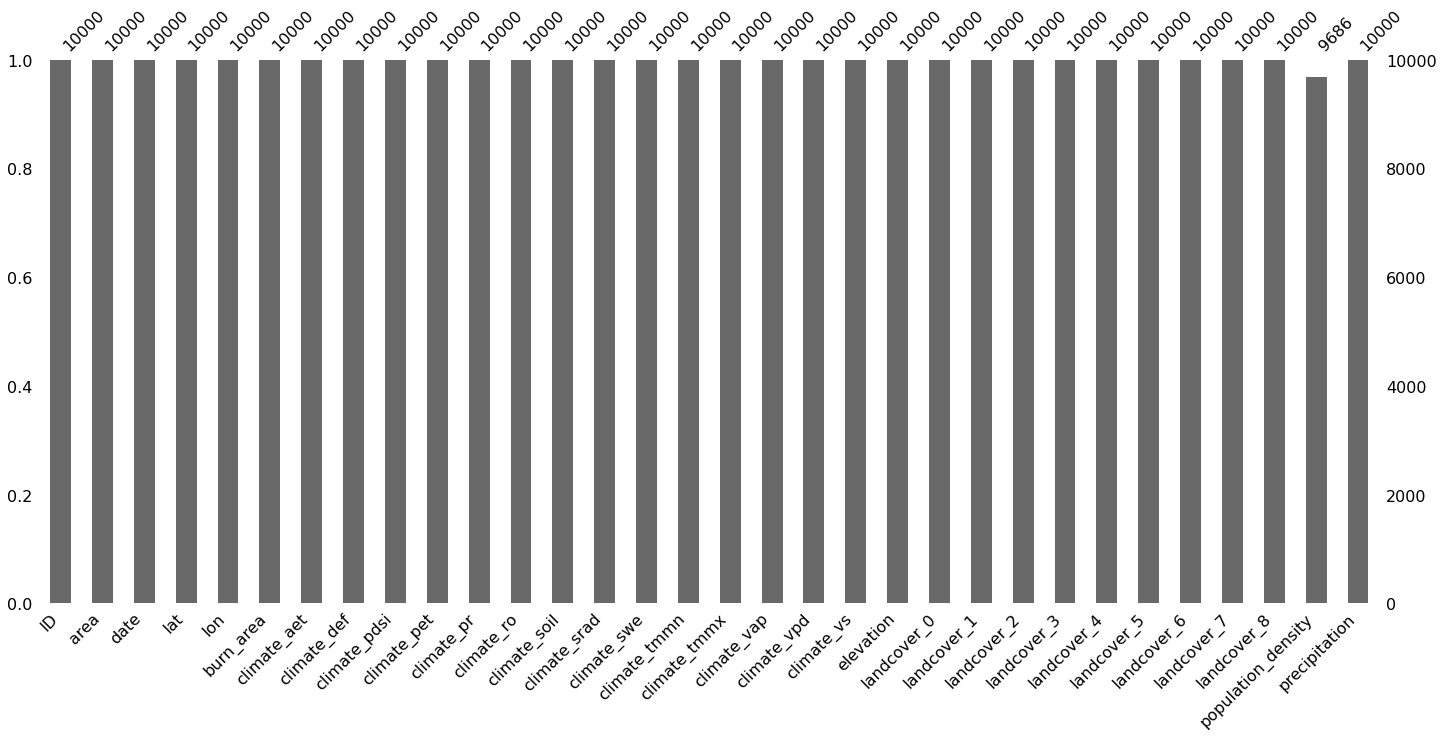

In [15]:
msno.bar(train.sample(10000)); #Showing a diagrammatic representation of the data and how many missing values are present in a 1000 sample

In [16]:
#Checking for duplication
train_dedupped = train.drop('ID', axis=1).drop_duplicates()
print(train.shape)
print(train_dedupped.shape)

(626644, 32)
(626644, 31)


In [17]:
train['population_density'].mean() #Mean of the population density column

30.022468269734553

In [18]:
train['population_density'].median() #Median of the population density column

14.14637717145552

In [19]:
train['population_density'].max() #Maximum population density value

9514.004269806168

In [20]:
train.loc[train['population_density'].isnull()] #Null values in the population density column

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation
1685,1685_2000-04-01,1685,2000-04-01,22.522,-2.060,0.0,953.745391,0.0,-201.912761,953.745391,...,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN,0.270578
1686,1686_2000-04-01,1686,2000-04-01,22.745,-2.059,0.0,963.109690,0.0,-176.605768,963.109690,...,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN,0.260574
1687,1687_2000-04-01,1687,2000-04-01,22.968,-2.058,0.0,964.944552,0.0,-175.320971,964.944552,...,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN,0.246479
1691,1691_2000-04-01,1691,2000-04-01,23.857,-2.053,0.0,989.603828,0.0,-154.471049,989.603828,...,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN,0.240277
1692,1692_2000-04-01,1692,2000-04-01,24.079,-2.052,0.0,994.569687,0.0,-126.202003,994.569687,...,0.0,0.997234,0.0,0.0,0.0,0.002766,0.0,0.000000,NaN,0.227709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625245,2422_2013-12-01,2422,2013-12-01,24.105,-4.732,0.0,930.304938,0.0,-769.155833,930.304938,...,0.0,0.998771,0.0,0.0,0.0,0.001229,0.0,0.000000,NaN,0.134117
625246,2423_2013-12-01,2423,2013-12-01,24.327,-4.729,0.0,944.210735,0.0,-787.889156,944.210735,...,0.0,0.901024,0.0,0.0,0.0,0.097439,0.0,0.001537,NaN,0.166199
625247,2424_2013-12-01,2424,2013-12-01,24.550,-4.726,0.0,951.911637,0.0,-818.529214,951.911637,...,0.0,0.899624,0.0,0.0,0.0,0.098840,0.0,0.001537,NaN,0.196682
625321,2498_2013-12-01,2498,2013-12-01,24.330,-4.952,0.0,945.246880,0.0,-793.199472,945.246880,...,0.0,0.785504,0.0,0.0,0.0,0.214496,0.0,0.000000,NaN,0.157668


In [21]:
#Loading the test data
test = pd.read_csv('test.csv', parse_dates=['date'])

In [22]:
test.describe() #Test data description

,area,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,...,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation
count,137556.000000,137556.000000,137556.000000,137556.0,137556.000000,137556.000000,137556.000000,137556.000000,137556.000000,137556.000000,...,137556.000000,137556.000000,1.375560e+05,137556.000000,137556.000000,137556.000000,137556.000000,137556.000000,133272.000000,137556.000000
mean,1910.000000,23.743978,-2.859994,0.0,864.402831,260.259443,-515.509934,1124.662595,110.082514,24.097503,...,0.000046,0.767847,2.927091e-07,0.189053,0.000300,0.029133,0.000038,0.001201,35.321161,0.171752
std,1103.031661,3.892359,4.397933,0.0,307.704470,400.966028,483.996616,169.401335,74.112202,40.382936,...,0.000731,0.328336,1.031334e-05,0.314645,0.004824,0.087055,0.000552,0.009484,192.331234,0.120393
min,0.000000,12.416000,-13.394000,0.0,16.445837,0.000000,-1679.813736,563.465222,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,955.000000,20.741000,-6.146000,0.0,726.854412,0.000000,-906.618057,1009.217701,48.235036,2.265291,...,0.000000,0.593401,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,9.775668,0.077209
50%,1910.000000,24.107000,-2.945000,0.0,971.481037,5.584749,-522.843698,1099.403502,115.503642,6.000000,...,0.000000,0.969502,0.000000e+00,0.000000,0.000000,0.000922,0.000000,0.000000,17.316966,0.165985
75%,2865.000000,26.956000,0.857000,0.0,1077.329737,419.024190,-237.316150,1216.970856,158.824573,28.320487,...,0.000000,1.000000,0.000000e+00,0.306922,0.000000,0.015084,0.000000,0.000000,32.673591,0.249339
max,3820.000000,31.096000,5.296000,0.0,1548.181424,2007.769204,1568.611504,2240.864900,597.041132,454.049353,...,0.042343,1.000000,6.147341e-04,1.000000,0.193573,0.991295,0.024590,0.486538,9514.004270,1.253528


In [23]:
test.shape #Showing the columns and rows of the test data

(137556, 32)

In [24]:
test.index

RangeIndex(start=0, stop=137556, step=1)

In [25]:
test.head() #First 5 rows

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation
0,0_2014-01-01,0,2014-01-01,25.447,5.296,0,142.756021,1217.926180,-953.401012,1360.571291,...,0.0,0.430648,0.0,0.569045,0.0,0.000307,0.0,0.0,2.773423,0.000457
1,1_2014-01-01,1,2014-01-01,25.669,5.293,0,154.836847,1193.866315,-961.703043,1348.688788,...,0.0,0.494624,0.0,0.505068,0.0,0.000307,0.0,0.0,4.697883,0.000129
2,2_2014-01-01,2,2014-01-01,25.443,5.074,0,127.790933,1223.640222,-962.435857,1351.521823,...,0.0,0.288343,0.0,0.711657,0.0,0.000000,0.0,0.0,2.488614,0.000398
3,3_2014-01-01,3,2014-01-01,25.665,5.070,0,136.924571,1201.258784,-961.326298,1338.120278,...,0.0,0.492103,0.0,0.507897,0.0,0.000000,0.0,0.0,2.439959,0.000158
4,4_2014-01-01,4,2014-01-01,25.886,5.067,0,144.278146,1197.831547,-959.248284,1342.118844,...,0.0,0.333855,0.0,0.666145,0.0,0.000000,0.0,0.0,2.546723,0.000153


In [26]:
test.tail() #Last 5 rows

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation
137551,3816_2016-12-01,3816,2016-12-01,29.075,-13.214,0,1106.666078,0.0,701.364429,1106.666078,...,0.0,0.003381,0.0,0.994776,0.0,0.001843,0.0,0.0,14.813819,0.302496
137552,3817_2016-12-01,3817,2016-12-01,29.298,-13.202,0,1110.827869,0.0,712.703513,1110.827869,...,0.0,0.001844,0.0,0.998156,0.0,0.000000,0.0,0.0,14.815366,0.315196
137553,3818_2016-12-01,3818,2016-12-01,29.522,-13.189,0,1104.297877,0.0,728.047262,1104.297877,...,0.0,0.007992,0.0,0.992008,0.0,0.000000,0.0,0.0,15.981201,0.312253
137554,3819_2016-12-01,3819,2016-12-01,29.745,-13.176,0,1103.605791,0.0,730.454929,1103.605791,...,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,15.206220,0.316645
137555,3820_2016-12-01,3820,2016-12-01,29.758,-13.394,0,1115.367057,0.0,741.525973,1115.367057,...,0.0,0.000000,0.0,0.998742,0.0,0.001258,0.0,0.0,15.574830,0.329992


In [27]:
test.info() #Information about the test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137556 entries, 0 to 137555
Data columns (total 32 columns):
ID                    137556 non-null object
area                  137556 non-null int64
date                  137556 non-null datetime64[ns]
lat                   137556 non-null float64
lon                   137556 non-null float64
burn_area             137556 non-null int64
climate_aet           137556 non-null float64
climate_def           137556 non-null float64
climate_pdsi          137556 non-null float64
climate_pet           137556 non-null float64
climate_pr            137556 non-null float64
climate_ro            137556 non-null float64
climate_soil          137556 non-null float64
climate_srad          137556 non-null float64
climate_swe           137556 non-null float64
climate_tmmn          137556 non-null float64
climate_tmmx          137556 non-null float64
climate_vap           137556 non-null float64
climate_vpd           137556 non-null float64
climate_vs   

In [28]:
test.isnull().sum() #Showing the null values of the test data

ID                       0
area                     0
date                     0
lat                      0
lon                      0
burn_area                0
climate_aet              0
climate_def              0
climate_pdsi             0
climate_pet              0
climate_pr               0
climate_ro               0
climate_soil             0
climate_srad             0
climate_swe              0
climate_tmmn             0
climate_tmmx             0
climate_vap              0
climate_vpd              0
climate_vs               0
elevation                0
landcover_0              0
landcover_1              0
landcover_2              0
landcover_3              0
landcover_4              0
landcover_5              0
landcover_6              0
landcover_7              0
landcover_8              0
population_density    4284
precipitation            0
dtype: int64

In [29]:
# Percentage of null values present in each column
for col in test.columns:
    pct_missing = np.mean(test[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ID - 0.0%
area - 0.0%
date - 0.0%
lat - 0.0%
lon - 0.0%
burn_area - 0.0%
climate_aet - 0.0%
climate_def - 0.0%
climate_pdsi - 0.0%
climate_pet - 0.0%
climate_pr - 0.0%
climate_ro - 0.0%
climate_soil - 0.0%
climate_srad - 0.0%
climate_swe - 0.0%
climate_tmmn - 0.0%
climate_tmmx - 0.0%
climate_vap - 0.0%
climate_vpd - 0.0%
climate_vs - 0.0%
elevation - 0.0%
landcover_0 - 0.0%
landcover_1 - 0.0%
landcover_2 - 0.0%
landcover_3 - 0.0%
landcover_4 - 0.0%
landcover_5 - 0.0%
landcover_6 - 0.0%
landcover_7 - 0.0%
landcover_8 - 0.0%
population_density - 3.0%
precipitation - 0.0%


In [30]:
test.skew()

area                    0.000000
lat                    -0.364328
lon                    -0.106591
burn_area               0.000000
climate_aet            -1.090913
climate_def             1.565898
climate_pdsi            0.538795
climate_pet             0.896554
climate_pr              0.383659
climate_ro              2.746634
climate_soil            1.135701
climate_srad           -0.044791
climate_swe           370.885427
climate_tmmn           -1.740473
climate_tmmx           -1.135512
climate_vap            -1.115007
climate_vpd             2.028968
climate_vs              1.134443
elevation               1.454059
landcover_0             8.821146
landcover_1            34.255840
landcover_2            -1.212434
landcover_3            38.978662
landcover_4             1.438090
landcover_5            27.130238
landcover_6             5.840951
landcover_7            28.639396
landcover_8            37.278660
population_density     38.841177
precipitation           0.562560
dtype: flo

In [31]:
test.kurt()

area                      -1.200000
lat                       -0.664333
lon                       -0.941580
burn_area                  0.000000
climate_aet                0.185548
climate_def                1.420949
climate_pdsi               0.150765
climate_pet                1.705186
climate_pr                 0.431527
climate_ro                10.127647
climate_soil               0.798910
climate_srad               0.078814
climate_swe           137556.000000
climate_tmmn               4.095811
climate_tmmx               4.405106
climate_vap                0.838697
climate_vpd                6.291927
climate_vs                 2.241490
elevation                  2.778181
landcover_0               82.074454
landcover_1             1499.665508
landcover_2               -0.041499
landcover_3             1707.404729
landcover_4                0.536621
landcover_5              872.608872
landcover_6               43.771142
landcover_7             1049.771414
landcover_8             1786

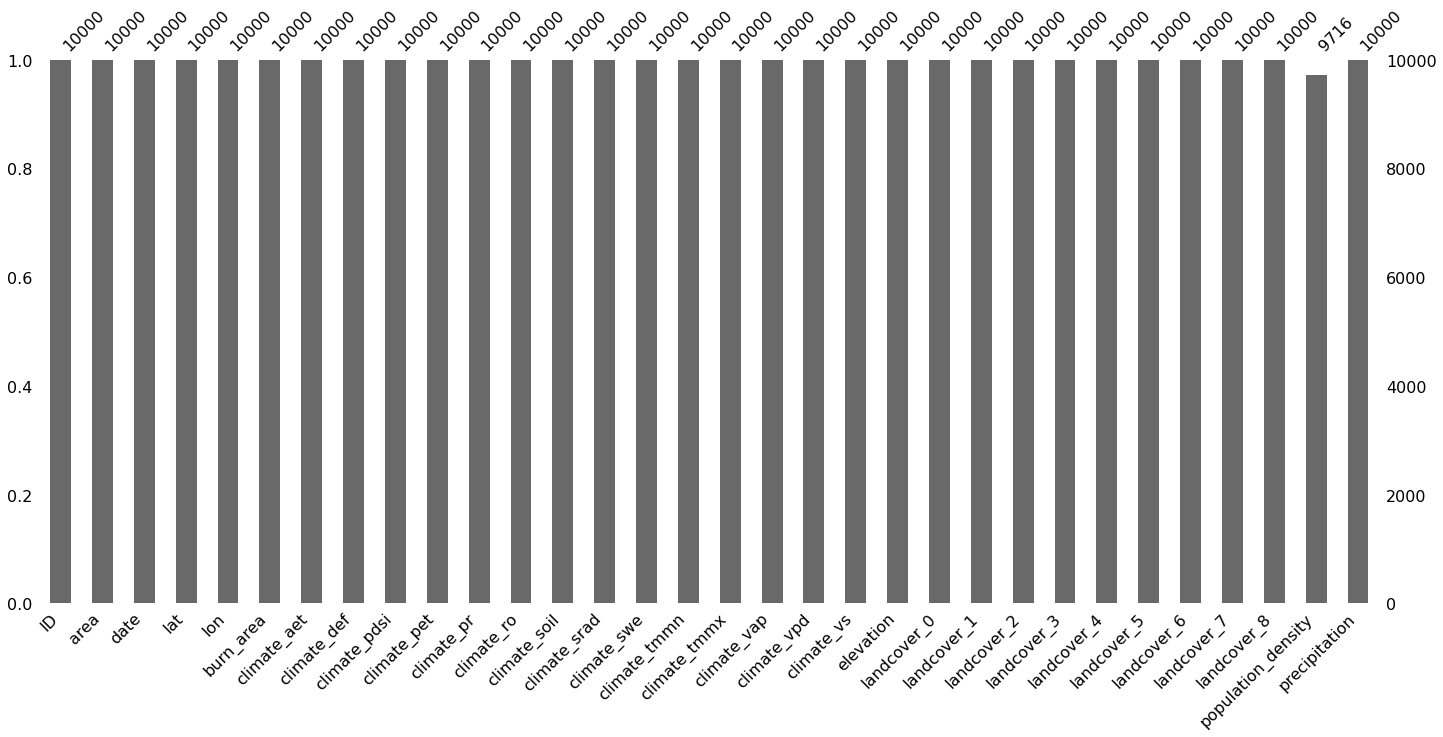

In [32]:
msno.bar(test.sample(10000)); #Diagrammatic representation of the missing values in each column

In [33]:
#Checking for duplication
test_dedupped = test.drop('ID', axis=1).drop_duplicates()
print(test.shape)
print(test_dedupped.shape)

(137556, 32)
(137556, 31)


In [34]:
#Adding month and year columns to both train and test data
train['month'] = train.date.dt.month
train['year'] = train.date.dt.year
test['month'] = test.date.dt.month
test['year'] = test.date.dt.year

In [35]:
train.head() #Checking the first 5 rows of the new train data

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation,month,year
0,0_2000-04-01,0,2000-04-01,25.447,5.296,0.003688,1250.622712,0.0,-178.916305,1250.622712,...,0.0,0.649524,0.0,0.000307,0.0,0.0,2.214262,0.198996,4,2000
1,1_2000-04-01,1,2000-04-01,25.669,5.293,0.000000,1238.019166,0.0,-150.779947,1238.019166,...,0.0,0.570644,0.0,0.000307,0.0,0.0,3.833042,0.188071,4,2000
2,2_2000-04-01,2,2000-04-01,25.443,5.074,0.000000,1240.449964,0.0,-200.503858,1240.449964,...,0.0,0.761700,0.0,0.000000,0.0,0.0,1.927303,0.211730,4,2000
3,3_2000-04-01,3,2000-04-01,25.665,5.070,0.000000,1229.240077,0.0,-177.011032,1229.240077,...,0.0,0.511854,0.0,0.000000,0.0,0.0,1.878281,0.215403,4,2000
4,4_2000-04-01,4,2000-04-01,25.886,5.067,0.000307,1224.093679,0.0,-153.256111,1224.093679,...,0.0,0.677757,0.0,0.000000,0.0,0.0,1.968818,0.199975,4,2000


In [36]:
train.tail() #Checking the last 5 rows of the new train data

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation,month,year
626639,3816_2013-12-01,3816,2013-12-01,29.075,-13.214,0.0,1135.610247,0.0,147.779270,1135.610247,...,0.0,0.988557,0.0,0.002558,0.0,0.0,14.813819,0.313800,12,2013
626640,3817_2013-12-01,3817,2013-12-01,29.298,-13.202,0.0,1143.499063,0.0,130.235363,1143.499063,...,0.0,0.993339,0.0,0.000000,0.0,0.0,14.815366,0.320290,12,2013
626641,3818_2013-12-01,3818,2013-12-01,29.522,-13.189,0.0,1139.045620,0.0,115.538994,1139.045620,...,0.0,0.980020,0.0,0.000000,0.0,0.0,15.981201,0.317855,12,2013
626642,3819_2013-12-01,3819,2013-12-01,29.745,-13.176,0.0,1141.168210,0.0,-7.484351,1141.168210,...,0.0,1.000000,0.0,0.000000,0.0,0.0,15.206220,0.282233,12,2013
626643,3820_2013-12-01,3820,2013-12-01,29.758,-13.394,0.0,1160.088274,0.0,-66.498403,1160.088274,...,0.0,0.999986,0.0,0.000014,0.0,0.0,15.574830,0.264007,12,2013


In [37]:
test.head() #Checking the first 5 rows of the new test data

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation,month,year
0,0_2014-01-01,0,2014-01-01,25.447,5.296,0,142.756021,1217.926180,-953.401012,1360.571291,...,0.0,0.569045,0.0,0.000307,0.0,0.0,2.773423,0.000457,1,2014
1,1_2014-01-01,1,2014-01-01,25.669,5.293,0,154.836847,1193.866315,-961.703043,1348.688788,...,0.0,0.505068,0.0,0.000307,0.0,0.0,4.697883,0.000129,1,2014
2,2_2014-01-01,2,2014-01-01,25.443,5.074,0,127.790933,1223.640222,-962.435857,1351.521823,...,0.0,0.711657,0.0,0.000000,0.0,0.0,2.488614,0.000398,1,2014
3,3_2014-01-01,3,2014-01-01,25.665,5.070,0,136.924571,1201.258784,-961.326298,1338.120278,...,0.0,0.507897,0.0,0.000000,0.0,0.0,2.439959,0.000158,1,2014
4,4_2014-01-01,4,2014-01-01,25.886,5.067,0,144.278146,1197.831547,-959.248284,1342.118844,...,0.0,0.666145,0.0,0.000000,0.0,0.0,2.546723,0.000153,1,2014


In [38]:
test.tail() #Checking the last 5 rows fo the new test data

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation,month,year
137551,3816_2016-12-01,3816,2016-12-01,29.075,-13.214,0,1106.666078,0.0,701.364429,1106.666078,...,0.0,0.994776,0.0,0.001843,0.0,0.0,14.813819,0.302496,12,2016
137552,3817_2016-12-01,3817,2016-12-01,29.298,-13.202,0,1110.827869,0.0,712.703513,1110.827869,...,0.0,0.998156,0.0,0.000000,0.0,0.0,14.815366,0.315196,12,2016
137553,3818_2016-12-01,3818,2016-12-01,29.522,-13.189,0,1104.297877,0.0,728.047262,1104.297877,...,0.0,0.992008,0.0,0.000000,0.0,0.0,15.981201,0.312253,12,2016
137554,3819_2016-12-01,3819,2016-12-01,29.745,-13.176,0,1103.605791,0.0,730.454929,1103.605791,...,0.0,1.000000,0.0,0.000000,0.0,0.0,15.206220,0.316645,12,2016
137555,3820_2016-12-01,3820,2016-12-01,29.758,-13.394,0,1115.367057,0.0,741.525973,1115.367057,...,0.0,0.998742,0.0,0.001258,0.0,0.0,15.574830,0.329992,12,2016


In [39]:
train['year'].value_counts() #Checking the total count of each train data

2013    45852
2012    45852
2011    45852
2010    45852
2009    45852
2008    45852
2007    45852
2006    45852
2005    45852
2004    45852
2003    45852
2002    45852
2001    42031
2000    34389
Name: year, dtype: int64

In [40]:
test['year'].value_counts() #Checking the total count of each test data

2016    45852
2015    45852
2014    45852
Name: year, dtype: int64

In [41]:
#Total count of actual burnt areas
actual_fires_train = train.loc[(train['burn_area'] > 0)]
actual_fires_train

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation,month,year
0,0_2000-04-01,0,2000-04-01,25.447,5.296,0.003688,1250.622712,0.000000,-178.916305,1250.622712,...,0.0,0.649524,0.000000,0.000307,0.000000,0.000000,2.214262,0.198996,4,2000
4,4_2000-04-01,4,2000-04-01,25.886,5.067,0.000307,1224.093679,0.000000,-153.256111,1224.093679,...,0.0,0.677757,0.000000,0.000000,0.000000,0.000000,1.968818,0.199975,4,2000
17,17_2000-04-01,17,2000-04-01,24.107,4.871,0.000615,1285.538959,0.000000,-299.597339,1285.538959,...,0.0,0.332061,0.000000,0.005225,0.000000,0.000000,2.876581,0.181754,4,2000
19,19_2000-04-01,19,2000-04-01,24.551,4.865,0.000615,1248.734944,0.000000,-275.291021,1248.734944,...,0.0,0.129401,0.000000,0.000000,0.000000,0.000000,4.229674,0.194645,4,2000
20,20_2000-04-01,20,2000-04-01,24.774,4.862,0.000115,1227.222808,0.000000,-260.758005,1227.222808,...,0.0,0.084525,0.000000,0.000000,0.000000,0.000000,2.778052,0.190455,4,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624033,1210_2013-12-01,1210,2013-12-01,29.568,-0.041,0.006147,1013.167209,131.752863,-179.976010,1144.996383,...,0.0,0.004610,0.000000,0.015761,0.000000,0.003074,35.686115,0.093971,12,2013
624195,1372_2013-12-01,1372,2013-12-01,29.352,-0.698,0.053790,893.328627,281.223751,258.750905,1174.556119,...,0.0,0.005225,0.000000,0.329923,0.000922,0.025972,140.576187,0.117765,12,2013
624196,1373_2013-12-01,1373,2013-12-01,29.569,-0.698,0.001229,944.409519,211.515221,280.026214,1155.954337,...,0.0,0.003169,0.021625,0.250930,0.003544,0.011035,165.836623,0.120907,12,2013
624250,1427_2013-12-01,1427,2013-12-01,29.352,-0.917,0.006762,961.852295,127.170894,177.465942,1088.996739,...,0.0,0.029589,0.000000,0.118587,0.000000,0.000585,179.830991,0.131186,12,2013


In [42]:
actual_fires_train['year'].value_counts() #Total count of years with actual fires

2010    9278
2005    9037
2006    8812
2004    8811
2003    8794
2008    8779
2013    8584
2011    8493
2007    8436
2002    8361
2009    8325
2012    8264
2000    7292
2001    6645
Name: year, dtype: int64

In [43]:
#Total count of actual burnt areas in test data
actual_fires_test = test.loc[(train['burn_area'] > 0)]
actual_fires_test

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation,month,year
0,0_2014-01-01,0,2014-01-01,25.447,5.296,0,142.756021,1217.926180,-953.401012,1360.571291,...,0.0,0.569045,0.000000,0.000307,0.0,0.000000,2.773423,0.000457,1,2014
4,4_2014-01-01,4,2014-01-01,25.886,5.067,0,144.278146,1197.831547,-959.248284,1342.118844,...,0.0,0.666145,0.000000,0.000000,0.0,0.000000,2.546723,0.000153,1,2014
17,17_2014-01-01,17,2014-01-01,24.107,4.871,0,159.899425,1255.846200,-990.161952,1415.694558,...,0.0,0.277967,0.000000,0.002766,0.0,0.000000,3.716652,0.003912,1,2014
19,19_2014-01-01,19,2014-01-01,24.551,4.865,0,140.156750,1241.332011,-1037.702729,1381.502584,...,0.0,0.076047,0.000000,0.000000,0.0,0.000000,5.493544,0.009871,1,2014
20,20_2014-01-01,20,2014-01-01,24.774,4.862,0,136.197746,1228.017148,-1039.308910,1364.297997,...,0.0,0.076862,0.000000,0.000000,0.0,0.000000,3.547208,0.015212,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137443,3708_2016-12-01,3708,2016-12-01,24.920,-10.961,0,1020.466935,0.000000,379.080469,1020.466935,...,0.0,0.597197,0.000000,0.000307,0.0,0.001225,17.001283,0.309477,12,2016
137445,3710_2016-12-01,3710,2016-12-01,25.370,-10.946,0,980.717271,0.000000,363.701688,980.717271,...,0.0,0.820477,0.000000,0.007991,0.0,0.001229,17.001283,0.256278,12,2016
137448,3713_2016-12-01,3713,2016-12-01,26.045,-10.922,0,961.564723,0.000000,310.625652,961.564723,...,0.0,0.720299,0.000307,0.004684,0.0,0.000000,31.570409,0.315666,12,2016
137461,3726_2016-12-01,3726,2016-12-01,24.702,-11.191,0,1010.136498,0.000000,410.311961,1010.136498,...,0.0,0.285318,0.000000,0.000307,0.0,0.000000,16.925015,0.270408,12,2016


In [44]:
actual_fires_test['year'].value_counts() #Total count of actual burns for each year

2016    8722
2014    8115
2015    6843
Name: year, dtype: int64

# 2. Feature Engineering

In [45]:
#To show whether a place was burnt or not depending on the burn_area value
burnt = []
for i in train.burn_area:
  if i <= 0:
    burnt.append(0)
  else:
    burnt.append(1)

In [46]:
train['burnt'] = burnt #Adding a new column called burnt

In [47]:
train.head() #Showing the first 5 rows of the new train data

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation,month,year,burnt
0,0_2000-04-01,0,2000-04-01,25.447,5.296,0.003688,1250.622712,0.0,-178.916305,1250.622712,...,0.649524,0.0,0.000307,0.0,0.0,2.214262,0.198996,4,2000,1
1,1_2000-04-01,1,2000-04-01,25.669,5.293,0.000000,1238.019166,0.0,-150.779947,1238.019166,...,0.570644,0.0,0.000307,0.0,0.0,3.833042,0.188071,4,2000,0
2,2_2000-04-01,2,2000-04-01,25.443,5.074,0.000000,1240.449964,0.0,-200.503858,1240.449964,...,0.761700,0.0,0.000000,0.0,0.0,1.927303,0.211730,4,2000,0
3,3_2000-04-01,3,2000-04-01,25.665,5.070,0.000000,1229.240077,0.0,-177.011032,1229.240077,...,0.511854,0.0,0.000000,0.0,0.0,1.878281,0.215403,4,2000,0
4,4_2000-04-01,4,2000-04-01,25.886,5.067,0.000307,1224.093679,0.0,-153.256111,1224.093679,...,0.677757,0.0,0.000000,0.0,0.0,1.968818,0.199975,4,2000,1


In [48]:
train.tail() #Showing the last 5 rows of the new train data

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation,month,year,burnt
626639,3816_2013-12-01,3816,2013-12-01,29.075,-13.214,0.0,1135.610247,0.0,147.779270,1135.610247,...,0.988557,0.0,0.002558,0.0,0.0,14.813819,0.313800,12,2013,0
626640,3817_2013-12-01,3817,2013-12-01,29.298,-13.202,0.0,1143.499063,0.0,130.235363,1143.499063,...,0.993339,0.0,0.000000,0.0,0.0,14.815366,0.320290,12,2013,0
626641,3818_2013-12-01,3818,2013-12-01,29.522,-13.189,0.0,1139.045620,0.0,115.538994,1139.045620,...,0.980020,0.0,0.000000,0.0,0.0,15.981201,0.317855,12,2013,0
626642,3819_2013-12-01,3819,2013-12-01,29.745,-13.176,0.0,1141.168210,0.0,-7.484351,1141.168210,...,1.000000,0.0,0.000000,0.0,0.0,15.206220,0.282233,12,2013,0
626643,3820_2013-12-01,3820,2013-12-01,29.758,-13.394,0.0,1160.088274,0.0,-66.498403,1160.088274,...,0.999986,0.0,0.000014,0.0,0.0,15.574830,0.264007,12,2013,0


In [49]:
#To show whether a place was burnt or not depending on the burn_area value
burnt_test = []
for i in test.burn_area:
  if i <= 0:
    burnt_test.append(0)
  else:
    burnt_test.append(1)

In [50]:
test['burnt'] = burnt_test #Adding the burnt column

In [51]:
test.head() #showing the first 5 rows of the new test data

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation,month,year,burnt
0,0_2014-01-01,0,2014-01-01,25.447,5.296,0,142.756021,1217.926180,-953.401012,1360.571291,...,0.569045,0.0,0.000307,0.0,0.0,2.773423,0.000457,1,2014,0
1,1_2014-01-01,1,2014-01-01,25.669,5.293,0,154.836847,1193.866315,-961.703043,1348.688788,...,0.505068,0.0,0.000307,0.0,0.0,4.697883,0.000129,1,2014,0
2,2_2014-01-01,2,2014-01-01,25.443,5.074,0,127.790933,1223.640222,-962.435857,1351.521823,...,0.711657,0.0,0.000000,0.0,0.0,2.488614,0.000398,1,2014,0
3,3_2014-01-01,3,2014-01-01,25.665,5.070,0,136.924571,1201.258784,-961.326298,1338.120278,...,0.507897,0.0,0.000000,0.0,0.0,2.439959,0.000158,1,2014,0
4,4_2014-01-01,4,2014-01-01,25.886,5.067,0,144.278146,1197.831547,-959.248284,1342.118844,...,0.666145,0.0,0.000000,0.0,0.0,2.546723,0.000153,1,2014,0


In [52]:
test.tail() #showing the last 5 rows of the new test data

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation,month,year,burnt
137551,3816_2016-12-01,3816,2016-12-01,29.075,-13.214,0,1106.666078,0.0,701.364429,1106.666078,...,0.994776,0.0,0.001843,0.0,0.0,14.813819,0.302496,12,2016,0
137552,3817_2016-12-01,3817,2016-12-01,29.298,-13.202,0,1110.827869,0.0,712.703513,1110.827869,...,0.998156,0.0,0.000000,0.0,0.0,14.815366,0.315196,12,2016,0
137553,3818_2016-12-01,3818,2016-12-01,29.522,-13.189,0,1104.297877,0.0,728.047262,1104.297877,...,0.992008,0.0,0.000000,0.0,0.0,15.981201,0.312253,12,2016,0
137554,3819_2016-12-01,3819,2016-12-01,29.745,-13.176,0,1103.605791,0.0,730.454929,1103.605791,...,1.000000,0.0,0.000000,0.0,0.0,15.206220,0.316645,12,2016,0
137555,3820_2016-12-01,3820,2016-12-01,29.758,-13.394,0,1115.367057,0.0,741.525973,1115.367057,...,0.998742,0.0,0.001258,0.0,0.0,15.574830,0.329992,12,2016,0


In [53]:
train['dry_and_windy'] = (1/train['climate_soil'])*train['climate_vs']
train['hot_and_dry'] = train['climate_srad'] *(1/train['climate_soil'])
train['low_pres_and_rain_def'] = train['climate_def'] *(1/train['climate_vap'])
train['pres_def_and_windy'] = (1/train['climate_aet'])*train['climate_vs']

test['dry_and_windy'] = (1/test['climate_soil'])*test['climate_vs']
test['hot_and_dry'] = test['climate_srad'] *(1/test['climate_soil'])
test['low_pres_and_rain_def'] = test['climate_def'] *(1/test['climate_vap'])
test['pres_def_and_windy'] = (1/test['climate_aet'])*test['climate_vs']

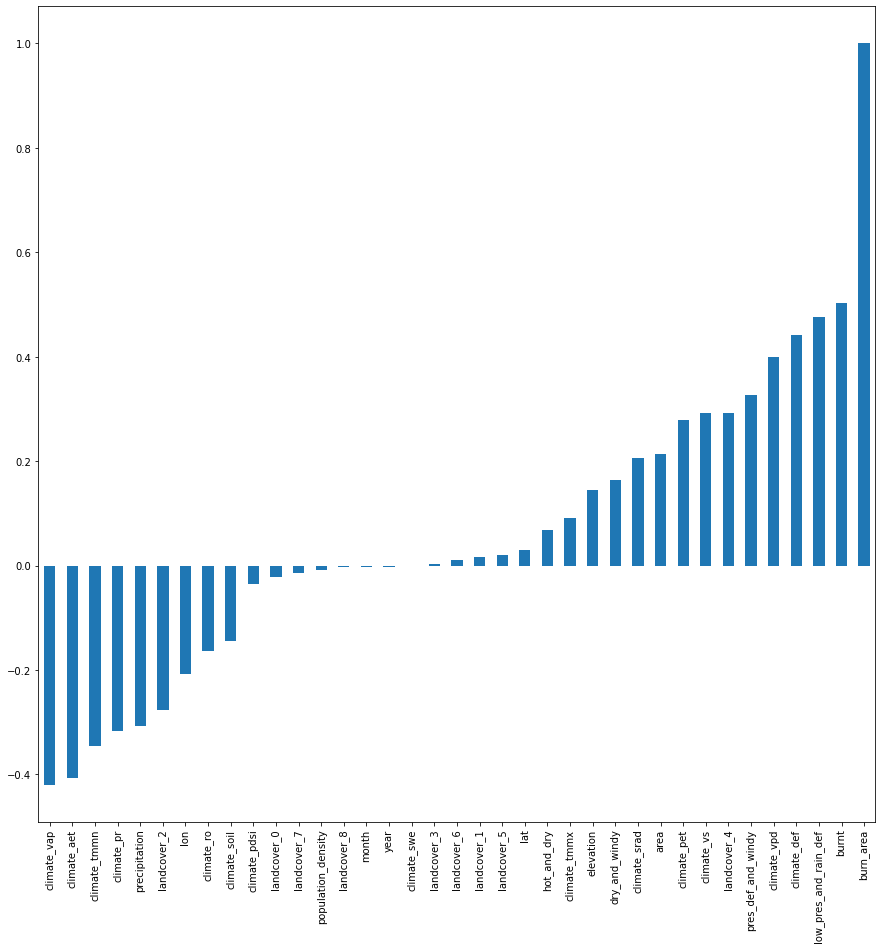

In [54]:
train.corr()['burn_area'].sort_values().plot(kind='bar', figsize=(15, 15)); #Showing the level of correlation between each column and the target column, burn_area

In [55]:
#train = train.drop(columns=['ID', 'area', 'date']) #Dropping columns with the least correlation
train.head() # showing the first 5 rows

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_8,population_density,precipitation,month,year,burnt,dry_and_windy,hot_and_dry,low_pres_and_rain_def,pres_def_and_windy
0,0_2000-04-01,0,2000-04-01,25.447,5.296,0.003688,1250.622712,0.0,-178.916305,1250.622712,...,0.0,2.214262,0.198996,4,2000,1,0.260215,4.296193,0.0,0.103808
1,1_2000-04-01,1,2000-04-01,25.669,5.293,0.000000,1238.019166,0.0,-150.779947,1238.019166,...,0.0,3.833042,0.188071,4,2000,0,0.219314,3.611870,0.0,0.104579
2,2_2000-04-01,2,2000-04-01,25.443,5.074,0.000000,1240.449964,0.0,-200.503858,1240.449964,...,0.0,1.927303,0.211730,4,2000,0,0.237695,3.987285,0.0,0.102826
3,3_2000-04-01,3,2000-04-01,25.665,5.070,0.000000,1229.240077,0.0,-177.011032,1229.240077,...,0.0,1.878281,0.215403,4,2000,0,0.203160,3.278266,0.0,0.107142
4,4_2000-04-01,4,2000-04-01,25.886,5.067,0.000307,1224.093679,0.0,-153.256111,1224.093679,...,0.0,1.968818,0.199975,4,2000,1,0.185364,2.939452,0.0,0.108942


In [56]:
train.tail() # showing the last 5 rows

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_8,population_density,precipitation,month,year,burnt,dry_and_windy,hot_and_dry,low_pres_and_rain_def,pres_def_and_windy
626639,3816_2013-12-01,3816,2013-12-01,29.075,-13.214,0.0,1135.610247,0.0,147.779270,1135.610247,...,0.0,14.813819,0.313800,12,2013,0,0.091045,0.592656,0.0,0.241639
626640,3817_2013-12-01,3817,2013-12-01,29.298,-13.202,0.0,1143.499063,0.0,130.235363,1143.499063,...,0.0,14.815366,0.320290,12,2013,0,0.107805,0.686748,0.0,0.245382
626641,3818_2013-12-01,3818,2013-12-01,29.522,-13.189,0.0,1139.045620,0.0,115.538994,1139.045620,...,0.0,15.981201,0.317855,12,2013,0,0.119466,0.751930,0.0,0.248775
626642,3819_2013-12-01,3819,2013-12-01,29.745,-13.176,0.0,1141.168210,0.0,-7.484351,1141.168210,...,0.0,15.206220,0.282233,12,2013,0,0.132692,0.829340,0.0,0.250006
626643,3820_2013-12-01,3820,2013-12-01,29.758,-13.394,0.0,1160.088274,0.0,-66.498403,1160.088274,...,0.0,15.574830,0.264007,12,2013,0,0.145475,0.897402,0.0,0.251500


In [57]:
train.shape # showing the new number of rows and columns of the train set

(626644, 39)

In [58]:
#test = test.drop(columns=['ID', 'area', 'date'])

In [59]:
test.shape # showing the new number of rows and columns of the test set

(137556, 39)

In [60]:
# Getting the target variable
target_var = train.burn_area

# Creating a separator column to show the various merged data
train['separator'] = 0
test['separator'] = 1

# Aligning the train and test sets
train, test = train.align(test, join = 'inner', axis = 1)

# Combining the train and test set for efficiency in generating features
combined_dataset = pd.concat([train, test])

In [61]:
combined_dataset

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,population_density,precipitation,month,year,burnt,dry_and_windy,hot_and_dry,low_pres_and_rain_def,pres_def_and_windy,separator
0,0_2000-04-01,0,2000-04-01,25.447,5.296,0.003688,1250.622712,0.0,-178.916305,1250.622712,...,2.214262,0.198996,4,2000,1,0.260215,4.296193,0.0,0.103808,0
1,1_2000-04-01,1,2000-04-01,25.669,5.293,0.000000,1238.019166,0.0,-150.779947,1238.019166,...,3.833042,0.188071,4,2000,0,0.219314,3.611870,0.0,0.104579,0
2,2_2000-04-01,2,2000-04-01,25.443,5.074,0.000000,1240.449964,0.0,-200.503858,1240.449964,...,1.927303,0.211730,4,2000,0,0.237695,3.987285,0.0,0.102826,0
3,3_2000-04-01,3,2000-04-01,25.665,5.070,0.000000,1229.240077,0.0,-177.011032,1229.240077,...,1.878281,0.215403,4,2000,0,0.203160,3.278266,0.0,0.107142,0
4,4_2000-04-01,4,2000-04-01,25.886,5.067,0.000307,1224.093679,0.0,-153.256111,1224.093679,...,1.968818,0.199975,4,2000,1,0.185364,2.939452,0.0,0.108942,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137551,3816_2016-12-01,3816,2016-12-01,29.075,-13.214,0.000000,1106.666078,0.0,701.364429,1106.666078,...,14.813819,0.302496,12,2016,0,0.064169,0.548764,0.0,0.201016,1
137552,3817_2016-12-01,3817,2016-12-01,29.298,-13.202,0.000000,1110.827869,0.0,712.703513,1110.827869,...,14.815366,0.315196,12,2016,0,0.070532,0.585048,0.0,0.206581,1
137553,3818_2016-12-01,3818,2016-12-01,29.522,-13.189,0.000000,1104.297877,0.0,728.047262,1104.297877,...,15.981201,0.312253,12,2016,0,0.076403,0.622842,0.0,0.211031,1
137554,3819_2016-12-01,3819,2016-12-01,29.745,-13.176,0.000000,1103.605791,0.0,730.454929,1103.605791,...,15.206220,0.316645,12,2016,0,0.080565,0.648859,0.0,0.213693,1


In [66]:
final_dataset = combined_dataset.drop(columns=['burnt', 'separator']) #Droping the burnt and separator dataset

In [67]:
final_dataset.head() #Showing first 5 rows of the final dataset to be sent to Azure for analysis

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_7,landcover_8,population_density,precipitation,month,year,dry_and_windy,hot_and_dry,low_pres_and_rain_def,pres_def_and_windy
0,0_2000-04-01,0,2000-04-01,25.447,5.296,0.003688,1250.622712,0.0,-178.916305,1250.622712,...,0.0,0.0,2.214262,0.198996,4,2000,0.260215,4.296193,0.0,0.103808
1,1_2000-04-01,1,2000-04-01,25.669,5.293,0.000000,1238.019166,0.0,-150.779947,1238.019166,...,0.0,0.0,3.833042,0.188071,4,2000,0.219314,3.611870,0.0,0.104579
2,2_2000-04-01,2,2000-04-01,25.443,5.074,0.000000,1240.449964,0.0,-200.503858,1240.449964,...,0.0,0.0,1.927303,0.211730,4,2000,0.237695,3.987285,0.0,0.102826
3,3_2000-04-01,3,2000-04-01,25.665,5.070,0.000000,1229.240077,0.0,-177.011032,1229.240077,...,0.0,0.0,1.878281,0.215403,4,2000,0.203160,3.278266,0.0,0.107142
4,4_2000-04-01,4,2000-04-01,25.886,5.067,0.000307,1224.093679,0.0,-153.256111,1224.093679,...,0.0,0.0,1.968818,0.199975,4,2000,0.185364,2.939452,0.0,0.108942


In [69]:
final_dataset.tail() #Showing first 5 rows of the final dataset to be sent to Azure for analysis

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_7,landcover_8,population_density,precipitation,month,year,dry_and_windy,hot_and_dry,low_pres_and_rain_def,pres_def_and_windy
137551,3816_2016-12-01,3816,2016-12-01,29.075,-13.214,0.0,1106.666078,0.0,701.364429,1106.666078,...,0.0,0.0,14.813819,0.302496,12,2016,0.064169,0.548764,0.0,0.201016
137552,3817_2016-12-01,3817,2016-12-01,29.298,-13.202,0.0,1110.827869,0.0,712.703513,1110.827869,...,0.0,0.0,14.815366,0.315196,12,2016,0.070532,0.585048,0.0,0.206581
137553,3818_2016-12-01,3818,2016-12-01,29.522,-13.189,0.0,1104.297877,0.0,728.047262,1104.297877,...,0.0,0.0,15.981201,0.312253,12,2016,0.076403,0.622842,0.0,0.211031
137554,3819_2016-12-01,3819,2016-12-01,29.745,-13.176,0.0,1103.605791,0.0,730.454929,1103.605791,...,0.0,0.0,15.206220,0.316645,12,2016,0.080565,0.648859,0.0,0.213693
137555,3820_2016-12-01,3820,2016-12-01,29.758,-13.394,0.0,1115.367057,0.0,741.525973,1115.367057,...,0.0,0.0,15.574830,0.329992,12,2016,0.085421,0.676922,0.0,0.216232


In [68]:
final_dataset.to_csv('final_dataset.csv', index=False) #Creating the final dataset in csv format to be analyzed with Azure